In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup 

### I want to first apologize because I'm handing this in super late. I'm kind of behind in all my classes and having a hard time keeping things organized and meeting deadlines because all of my classes are online this semester. I also just got rejected from all these companies and this week has been weird. I'm not sure if I've done everything I'm supposed to for this phase. 

## Intro:

My project will be analyzing linguistic trends in the Balkan peninsula. The bulk of my work will be analyzing linguistic trends between large works translated into each of the languages. I will also analyze smaller sets of data to compliment the overarching findings. 

Below, you will see that I imported a small table from Wikipedia that displayed the 12 Balkan nations and the languages spoken within them. I created a graph to show the percentage of people within each nation that speaks the most common language in that nation. This hints at a correlation I plan to explore later between the nation's age, recent border changes, mass migrations, among other factors. I also observed the presence of 15 unique langauges (I did not include languages spoken by less than 1% of a nation's population or dialects that are not distinctily considered to be a unique language by most linguists).

## Questions:

I want to look at two overarching aspects of this region. 
- 1. Are there relationships between historical trends and current linguistic trends?
- 2. Are there relationships between linguistic trends and nations' trajectories? 

To summarize, I want to look at a nation like Montenegro, in which less than 50% of citizens speak the most common language, then see what happened in the country's past that could have contributed to this, what this could mean for the nation's internal cohesion in the present, and if this could impact the nation's future in any way.

## Challenges: 

I have imported a few small datasets as of now, and I have also imported a large amount of data collected from the European parliament translated into various languages from this region. These datasets are each above 50MB and are quite large. I have run into some issues already because I did not attempt to open the data until recently, only to find that I'm having trouble even accessing it. It turns out that the data comes in an .sgm file, which we can use BeautifulSoup to read and web scrape. I aim to organize my data, simplify it, and rely on web scraping as little as possible and more on datasets that I know are of quality. Right now I have a starting point for my project I suppose and a rough direction I plan to go in.

An obvious challenge is going to be working with different spellings. It will be impossible to conduct analysis at a level of accuracy that I would prefer in the span of a semester with no background in conducting linguistic analysis or using software other than the one I am currently using. Each of these languages have their own alphabets, and even the romanized alphabets have accents that once replaced with other symbols in Jupyter may distort the meaning behind words. There will be trends that will be missed and trends that will be observed that are misleading. I'm already worried about working with the Romanian language because there will be variations of "a" and "i" used interchangeably that will throw off the data, especially depending on when the data was obtained since many words with "i" were changed to an "a" spelling after the most recent coup in 1989. However, things like this will also point to interesting trends. 

I think to mitigate this, while staying within the scope of this class and the software given to us, I can first research the alphabets of the langauges I'm analyzing and account for letters that may be used interchangeably in romanzied spellings. This will be particularly important for Greek texts, since Greek does not use the roman alphabet. 

I'm going to avoid comparing datasets from different sources and stick to as few sets as possible to avoid the issues explained above. If I use material from the same translation company, then there will be consistency in romanization. I also want to try to look for things written in the universal phoenetic alphabet. Lastly, I'm going to analyze trends that do not rely on word spelling (especially vowel sounds) and look at word lengths, syllables, consanents, usage of certain features (such as consonents in Hungarian), and overarching trends such as the percentage of people who speak each langauge in these regions and its proximity to neighboring languages, etc. 

Another thing I'm worried about is consistency in the words included in databases. I know that there are, for example, around 500 words borrowed from Turkish in the Romanian language. However, Wikipedia will only show you 200 of them, and the data table I will be working with here has around 50. I would not be able to accurately conclude that some languages are more similar to others simply based on numbers such as these. Additionally, some of this analysis may be territory that linguists have not even published findings on yet.

The last part of my project will be to analyze other factors about these languages, like different characteristics about the nations and groups that speak the languages, political history, etc. I am not worried about this part because this data will be easy to work with. I predict I will end up doing more of this than originally intended because it will be easier.

In [24]:
data = pd.read_csv("Balkan_Langs.csv")

In [25]:
balkan_langs = data.drop('Country', 1)
balkan_langs['Main Language'] = [i.lower() for i in balkan_langs['Main Language']]   
balkan_langs['Main Language'] = [i[3:] for i in balkan_langs['Main Language']]    
drop = balkan_langs['Minority Language'].dropna()

In [26]:
list = []
for i in drop:
    i = i.split(",")
    for j in i:
        j = j.lower()
        j = j[3:]
        list.append(j)
minority = pd.DataFrame( {"name" : list})
minority = minority.drop_duplicates()

In [5]:
new = []
for i in minority['name']: 
    new.append(i)
for j in balkan_langs['Main Language']:
    new.append(j)    
two = []
for i in new: 
    i = i.replace('(official)', '')
    two.append(i)

In [6]:
x = pd.Series(two)
unique = pd.DataFrame(x)
unique = unique[unique != ' other']
unique = unique[unique != 'other']
unique = unique[unique != ' unspecified']
unique = unique[unique != ' other and unspecified']
unique.drop_duplicates()
unique = unique.dropna()
unique[0] = [i.replace(" ", "") for i in unique[0]]
unique[0] = [i.replace("%", "") for i in unique[0]]
unique = unique.drop_duplicates()

In [7]:
unique = unique.rename(columns = {0:'unique_langs'})
balkan = data.drop(columns=['Unnamed: 0','Unnamed: 4','Unnamed: 5', 'Unnamed: 6', 'https://en.wikipedia.org/wiki/Balkans'])
balkan.columns = ['country', 'main_lang%', 'minority']

In [11]:
''' 
Below I'm trying to see if I can import the text I found in different languages using Beautiful Soup. 
It seems to work! This is the data that I will be donig a lot of work on because it is large in size. 
'''
a = open('alb01.sgm')
data= a.read()
soup = BeautifulSoup(data)


Text(0.5, 1.0, 'Percentage of People Who Speak Main Language')

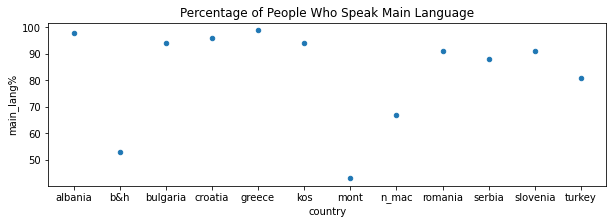

In [8]:
bm = balkan.loc[:, ('country', 'main_lang%')]
bm.loc[:, ('country')] = bm.loc[:, ('country')].str.lower()
bm.loc[:, ('country')] = bm.loc[:, ('country')].replace(' ', '_', regex=True)
bm.loc[:, ('country')] = bm.loc[:, ('country')].replace('bosnia_and_herzegovina', 'b&h', regex=True)
bm.loc[:, ('country')] = bm.loc[:, ('country')].replace('north_macedonia', 'n_mac', regex=True)
bm.loc[:, ('country')] = bm.loc[:, ('country')].replace('kosovo', 'kos', regex=True)
bm.loc[:, ('country')] = bm.loc[:, ('country')].replace('montenegro', 'mont', regex=True)
bm.loc[:, ('main_lang%')] = bm.loc[:, ('main_lang%')].apply(lambda x: x[:2])
bm['main_lang%'] = [int(i) for i in bm['main_lang%']]

bm.plot(x ='country', y='main_lang%', kind = 'scatter', figsize =(10,3))
plt.title("Percentage of People Who Speak Main Language")


In [22]:
unique = unique.sort_values(by='unique_langs')
print(unique)
print("Number of unique langauges spoken by more than 1% of a nation: {}".format(unique.shape[0]))


      unique_langs
11        albanian
8          bosnian
21       bulgarian
2         croatian
23           greek
15       hungarian
17         kurdish
26      macedonian
10     montenegrin
5           romani
27        romanian
1          serbian
16  serbo-croatian
29         slovene
4          turkish
Number of unique langauges spoken by more than 1% of a nation: 15


In [18]:
albanian = pd.read_csv("Albanian.csv")
bulgarian = pd.read_csv("Bulgarian.csv")
greek = pd.read_csv("Greek.csv")
hungarian = pd.read_csv("Hungarian.csv")
romanian = pd.read_csv("Romanian.csv")

albanian = albanian[['Name', 'Parameter']]
bulgarian = bulgarian[['Name', 'Parameter']]
greek = greek[['Name', 'Parameter']]
hungarian = hungarian[['Name', 'Parameter']]
romanian = romanian[['Name', 'Parameter']]

15

In [29]:
print(romanian)
print(albanian)
print(greek)
print(hungarian)
print(bulgarian)

            Name       Parameter
0           lume           world
1        pami_nt     earth, land
2         t_ar__     earth, land
3           praf            dust
4        pulbere            dust
...          ...             ...
1224      stafie  ghost, phantom
1225     spectru  ghost, phantom
1226    fantoma_  ghost, phantom
1227       augur   omen, portent
1228  prevestire   omen, portent

[1229 rows x 2 columns]
                 Name       Parameter
0               'bot_           world
1                  _e           world
2     r_okul_i a'l_em           world
3              du_'_a           world
4               'tok_     earth, land
...               ...             ...
1972          l_u'gat  ghost, phantom
1973          'k_ipul  ghost, phantom
1974       kuku'vrik_  ghost, phantom
1975            o'gur   omen, portent
1976             v_ng   omen, portent

[1977 rows x 2 columns]
                   Name           Parameter
0     'kosmos ['kozmos]               world
1         

### After looking at these, I want to zoom in on the words for "dust" in these languages.
I also have noticed that special characters have been replaced with underscores, which will make this very difficult.

In [61]:
print("Romanian:{}\n".format(romanian.loc[romanian['Parameter'] == 'dust']))
print("Hungarian:{}\n".format(hungarian.loc[hungarian['Parameter'] == 'dust']))
print("Albanian:{}\n".format(albanian.loc[albanian['Parameter'] == 'dust']))
print("Bulgarian:{}\n".format(bulgarian.loc[bulgarian['Parameter'] == 'dust']))
print("Greek:{}\n".format(greek.loc[greek['Parameter'] == 'dust']))

Romanian:      Name Parameter
3     praf      dust
4  pulbere      dust

Hungarian:  Name Parameter
4  por      dust

Albanian:      Name Parameter
8  'pluhur      dust

Bulgarian:   Name Parameter
4  prax      dust

Greek:     Name Parameter
5  'skoni      dust



## Observations:
As you can see, all languages here except for Greek share the letters "p" and "r" in the word for dust. A few use the "a" vowel and a few use the "u" vowel. 

## Plan:
There are a few things I want to do. I want to find some way to organize this data and find relevant trends. I also need to figure out what I will do about the underscores that are replacing special characters. I need to figure out how I will group data and figure out what kinds of words they are using in this dictionary and also how I will group them together. I would also like to create some Python functions that help me with this and return values that I can use for these trends. This will be a lot of work, but I'm passionate about this so I'm not too worried.